In [1]:
import pandas as pd
import re
import os

In [2]:
from email.parser import Parser

In [3]:
emails= pd.read_csv(r'D:\My Personal Documents\Learnings\Data Science\Data Sets\emails.csv')

In [7]:
msg=[]
emailmsg= list(emails.message[0:500000])
for i in emailmsg:
    msg.append(re.split(r'\n\n',re.split(r'FileName:',i)[1],maxsplit=1))
    #print(re.split(r'.pst',i)[1])

In [124]:
emailmsg= list(emails.message[0:500000])

In [113]:
email = Parser().parsestr(emails.message[2])

In [125]:
to_email_list=[]
from_email_list=[]
email_body=[]

for i in emailmsg:
    email = Parser().parsestr(i)
 
    to_email_list.append(email['To'])
    from_email_list.append(email['From'])
 
    email_body.append(email.get_payload())

In [127]:
import collections
print(collections.Counter(from_email_list).most_common(10))

[('kay.mann@enron.com', 16735), ('vince.kaminski@enron.com', 14354), ('jeff.dasovich@enron.com', 11405), ('chris.germany@enron.com', 8801), ('sara.shackleton@enron.com', 8777), ('tana.jones@enron.com', 8484), ('enron.announcements@enron.com', 8217), ('pete.davis@enron.com', 7754), ('steven.kean@enron.com', 6752), ('kate.symes@enron.com', 5281)]


In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words='english', max_df=0.50, min_df=2)
X = vect.fit_transform(msg_body)

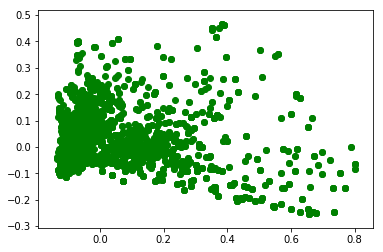

In [52]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
X_dense = X.todense()
coords = PCA(n_components=2).fit_transform(X_dense)
plt.scatter(coords[:, 0], coords[:, 1], c='g')
plt.show()

In [20]:
def top_tfidf_feats(row, features, top_n=20):
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats, columns=['features', 'score'])
    return df
def top_feats_in_doc(X, features, row_id, top_n=25):
    row = np.squeeze(X[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [22]:
import numpy as np
features = vect.get_feature_names()
print (top_feats_in_doc(X, features, 1, 10))

     features     score
0    meetings  0.398397
1        trip  0.325509
2    business  0.288191
3         ski  0.283202
4       takes  0.212222
5         try  0.152544
6   stimulate  0.151627
7   presenter  0.145981
8  productive  0.143669
9      flying  0.143669


In [25]:
def top_mean_feats(X, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    if grp_ids:
        D = X[grp_ids].toarray()
    else:
        D = X.toarray()
    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [26]:
print (top_mean_feats(X, features, top_n=10))

  features     score
0      ect  0.060766
1    enron  0.032373
2      hou  0.026333
3      com  0.025908
4  phillip  0.019112
5     john  0.016949
6     2000  0.012648
7    allen  0.012578
8   arnold  0.010482
9     2001  0.010142


In [28]:
from sklearn.cluster import KMeans
n_clusters = 3
clf = KMeans(n_clusters=n_clusters, max_iter=100, init='k-means++', n_init=1)
labels = clf.fit_predict(X)

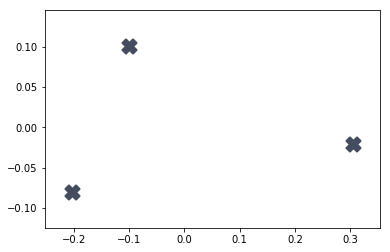

In [34]:
label_colors = ["#2AB0E9", "#2BAF74", "#D7665E", "#CCCCCC", 

                "#D2CA0D", "#522A64", "#A3DB05", "#FC6514"]

colors = [label_colors[i] for i in labels]



#plt.scatter(coords[:, 0], coords[:, 1], c=colors)

# Plot the cluster centers

centroids = clf.cluster_centers_

#centroid_coords = coords.transform(centroids)
centroid_coords=PCA(n_components=2).fit_transform(centroids)
plt.scatter(centroid_coords[:, 0], centroid_coords[:, 1], marker='X', s=200, linewidths=2, c='#444d60')

plt.show()



#Use this to print the top terms per cluster with matplotlib.

#plot_tfidf_classfeats_h(top_feats_per_cluster(X, labels, features, 0.1, 25))

In [51]:
coords[4999]

array([-0.08039769,  0.09177456])

In [263]:
type(clean_msg)

pandas.core.series.Series

In [59]:
x = np.arange(9).reshape(1,3,3) 


In [76]:
vect.max_df

0.5

In [61]:
x[0]

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [64]:
x[0][0][0]

0